### Baseball Case Study
##### Project Description
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 
##### -- Input features-
1. W - This indicates the number of Wins credited to a pitcher: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work.
2. R - This indicates Runs scored. A run is scored when a player advances around first, second and third base and returns safely to home plate, touching the bases in that order, before three outs are recorded and all obligations to reach base safely on batted balls are met or assured: number of times a player crosses home plate.
3. AB - This means At bat or time at bat. It's is a batter's turn batting against a pitcher: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.
4. H - This means Hit. It's also called a "base hit", is credited to a batter when the batter safely reaches or passes first base after hitting the ball into fair territory, without the benefit of either an error or a fielder's choice: reaching base because of a batted, fair ball without error by the defense.
5. 2B - This means the act of a batter striking the pitched ball and safely reaching second base without being called out by the umpire, without the benefit of a fielder's misplay (see error) or another runner being put out on a fielder's choice. A double is a type of hit (the others being the single, triple and home run) and is sometimes called a "two-bagger" or "two-base hit": hits on which the batter reaches second base safely without the contribution of a fielding error.
6. 3B - This measns a Triple.It's is the act of a batter safely reaching third base after hitting the ball, with neither the benefit of a fielder's misplay nor another runner being put out on a fielder's choice. A triple is sometimes called a "three-bagger" or "three-base hit": hits on which the batter reaches third base safely without the contribution of a fielding error.
7. HR - This means Home runs. It's scored when the ball is hit in such a way that the batter is able to circle the bases and reach home plate safely in one play without any errors being committed by the defensive team. A home run is usually achieved by hitting the ball over the outfield fence between the foul poles (or hitting either foul pole) without the ball touching the field: hits on which the batter successfully touched all four bases, without the contribution of a fielding error.
8. BB - This means Base on balls (also called a "walk"). It occurs in baseball when a batter receives four pitches that the umpire calls balls, and is in turn awarded first base without the possibility of being called out: hitter not swinging at four pitches called out of the strike zone and awarded first base.
9. SO - Also denoted as "K" means Strikeout. It occurs when a batter accumulates three strikes during a time at bat. It usually means that the batter is out: number of batters who received strike three.
10. SB - This means Stolen base. It occurs when a runner advances to a base to which they are not entitled and the official scorer rules that the advance should be credited to the action of the runner: number of bases advanced by the runner while the ball is in the possession of the defense.
11. RA - This means Run Average. It refer to measures of the rate at which runs are allowed or scored.
12. ER - This means Earned run. It refers to any run that was fully enabled by the offensive team's production in the face of competent play from the defensive team: number of runs that did not occur as a result of errors or passed balls.
13. ERA - This means Earned Run Average. It refers to the average of earned runs allowed by a pitcher per nine innings pitched (i.e. the traditional length of a game). It is determined by dividing the number of earned runs allowed by the number of innings pitched and multiplying by nine: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.
14. CG - This means Complete Game. It's the act of a pitcher pitching an entire game without the benefit of a relief pitcher. A pitcher who meets this criterion will be credited with a complete game regardless of the number of innings played: number of games where player was the only pitcher for their team.
15. SHO - This means Shutout. It refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run: number of complete games pitched with no runs allowed.
16. SV - This means Save. It's credited to a pitcher who finishes a game for the winning team under certain prescribed circumstances: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either 

(a) the lead was three runs or fewer when the pitcher entered the game; 
(b) the potential tying run was on base, at bat, or on deck; or 
(c) the pitcher pitched three or more innings.

17.E - This means Errors. It's an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. The term error is sometimes used to refer to the play during which an error was committed: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result.

##### -- Output: Number of predicted wins (W)
To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics
For downloading the dataset, use the link given below. 

##### Dataset Link-
•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import joblib

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


This dataset consisting the complete information of the features, we need to conclude the winning scores depending on all these different features. 

In [22]:
# Displaying the first few rows of the dataset
print("Dataset Overview:")
print(df.head())

Dataset Overview:
    W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86  


In [23]:
#checking the shape of the dataset
df.shape

(30, 17)

In [24]:
#checking the defined columns in the dataset
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [25]:
#listing the different columns in the dataset
df.columns.tolist()

['W',
 'R',
 'AB',
 'H',
 '2B',
 '3B',
 'HR',
 'BB',
 'SO',
 'SB',
 'RA',
 'ER',
 'ERA',
 'CG',
 'SHO',
 'SV',
 'E']

In [7]:
#checking for data type
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [8]:
#checking for any null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [9]:
df.isnull().sum().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [11]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [19]:
#dropping rows with missing values
df.dropna(inplace=True)

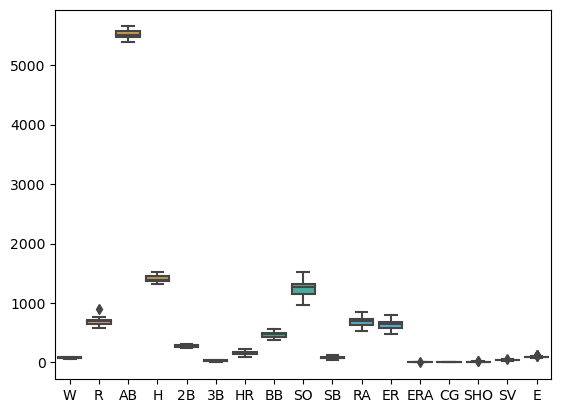

In [21]:
#checking for outliers
sns.boxplot(data=df)
plt.show()

This data presentation shows the outliers in the dataset

In [29]:
#Removing outliers using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
data = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

Now we will try to build and test different models

In [30]:
X = df.drop(columns=['W'])
y = df['W']

In [31]:
#Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
#Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
#Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

In [37]:
#We will train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    results[name] = {
        "MSE": mse,
        "R2": r2,
        "CV Mean Score": np.mean(cv_scores),
        "CV Std Score": np.std(cv_scores)
    }

In [36]:
#We need to check the underfitting/overfitting and cross-validation
for name, result in results.items():
    print(f"Model: {name}")
    print(f"MSE: {result['MSE']}")
    print(f"R2 Score: {result['R2']}")
    print(f"Cross-Validation Mean Score: {result['CV Mean Score']}")
    print(f"Cross-Validation Std Score: {result['CV Std Score']}")
    print()

Model: Linear Regression
MSE: 27.94303250666779
R2 Score: 0.7876400316149377
Cross-Validation Mean Score: -19.716657361586837
Cross-Validation Std Score: 39.50504796066652

Model: Random Forest
MSE: 52.0209166666667
R2 Score: 0.6046542115262822
Cross-Validation Mean Score: 0.4245720004501992
Cross-Validation Std Score: 0.17921776441567114



In [38]:
#Now we will select the best/final performing model
best_model_name = min(results, key=lambda x: results[x]['MSE'])
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")

Best Model: Linear Regression


In [40]:
#Hyperparameter tuning on the best model
param_grid = {}
if best_model_name == "Random Forest":
    param_grid = {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    }

In [41]:
grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), param_grid={},
             scoring='neg_mean_squared_error')

In [42]:
# We will save the best model for production
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'baseball_model.pkl')

['baseball_model.pkl']

Based on the developed model, the number of wins can be predicted for a baseball team given the input features such as runs scored, hits, home runs, earned run average (ERA), etc. However, without specific input data for a particular team's performance, we cannot generate a prediction for the winners of a specific game or season.